In [2]:
import math
import matplotlib.pyplot as plt
import keras
import seaborn as sns
import numpy as np
import os
import pathlib
import tensorflow as tf 
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU, Activation
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import image_dataset_from_directory
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

## Check dataset

In [3]:
# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = './images/images/'

for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

3993 angry images
436 disgust images
4103 fear images
7164 happy images
4982 neutral images
4938 sad images
3205 surprise images


## Show some pics

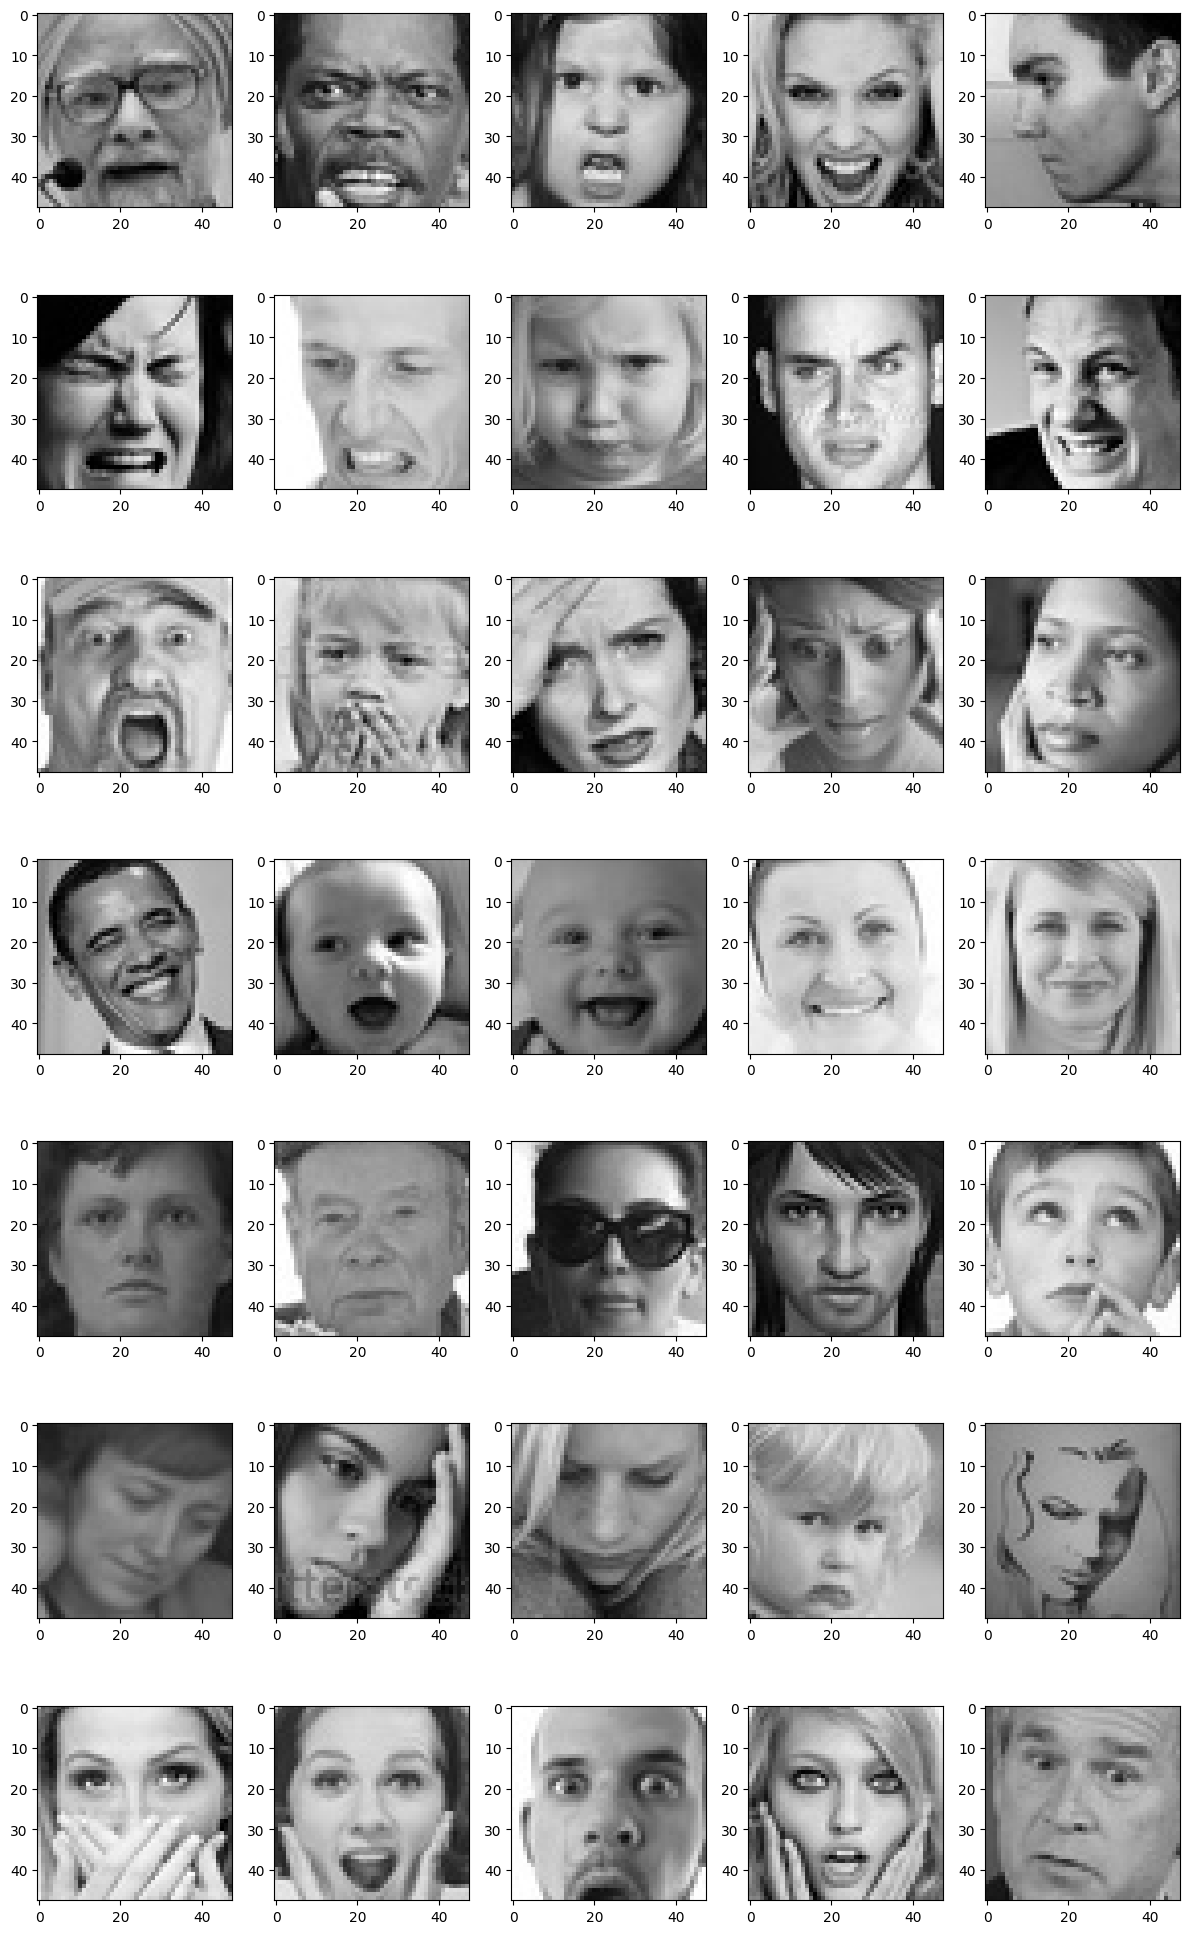

In [4]:
plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

## Test Model 1
### Dropout rate = 0.3
### Change hyperparameters

In [4]:
# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 2nd Convolution layer
model.add(Conv2D(128,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 3rd Convolution layer
model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Fully connected layer 2nd layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## Data generator

In [5]:
# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="rgb",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## Train model 1

In [6]:
train_path = './images/train/'
validation_path = './images/validation/'

train_dataset = image_dataset_from_directory(
                train_path, image_size=(48,48), 
                batch_size=batch_size,
                label_mode='categorical')
validation_dataset = image_dataset_from_directory(
                    validation_path, 
                    image_size=(48,48), 
                    batch_size=batch_size, 
                    label_mode='categorical')

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


In [7]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [8]:
callbacks = [
    ModelCheckpoint(
        filepath="./models/original_model.keras",
        save_best_only=True,
        monitor="val_loss")
]

with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset,
        epochs=50,
        validation_data=validation_dataset,
        callbacks=callbacks)

Epoch 1/50


226/226 [==============================] - 29s 101ms/step - loss: 2.0771 - accuracy: 0.2214 - val_loss: 1.8042 - val_accuracy: 0.2723
Epoch 2/50
226/226 [==============================] - 11s 48ms/step - loss: 1.9110 - accuracy: 0.2633 - val_loss: 1.7451 - val_accuracy: 0.3082
Epoch 3/50
226/226 [==============================] - 11s 48ms/step - loss: 1.8255 - accuracy: 0.3004 - val_loss: 1.7101 - val_accuracy: 0.3397
Epoch 4/50
226/226 [==============================] - 11s 48ms/step - loss: 1.7506 - accuracy: 0.3311 - val_loss: 1.7385 - val_accuracy: 0.3364
Epoch 5/50
226/226 [==============================] - 11s 48ms/step - loss: 1.6952 - accuracy: 0.3504 - val_loss: 1.6937 - val_accuracy: 0.3661
Epoch 6/50
226/226 [==============================] - 11s 48ms/step - loss: 1.6433 - accuracy: 0.3717 - val_loss: 1.7351 - val_accuracy: 0.3663
Epoch 7/50
226/226 [==============================] - 11s 49ms/step - loss: 1.6111 - accuracy: 0.3792 - val_loss: 1.5209 - val_accuracy: 0.4152
Ep

## Model evaluation

In [9]:
score = model.evaluate(validation_dataset)
# Print the accuracy
print("Validation Loss:", score[0])
print("Validation Accuracy:", score[1])

56/56 [==============================] - 2s 25ms/step - loss: 1.0507 - accuracy: 0.6240
Validation Loss: 1.050720453262329
Validation Accuracy: 0.6239739656448364


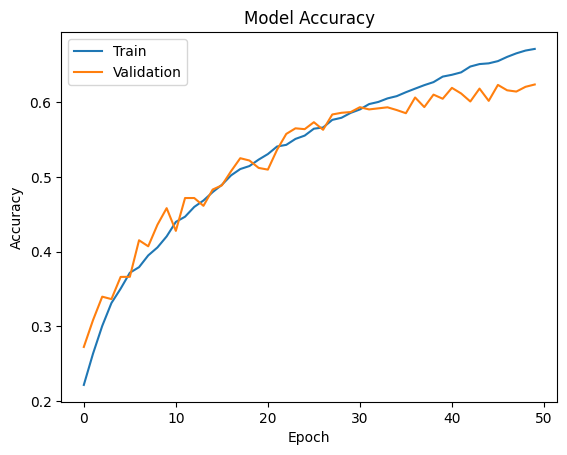

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

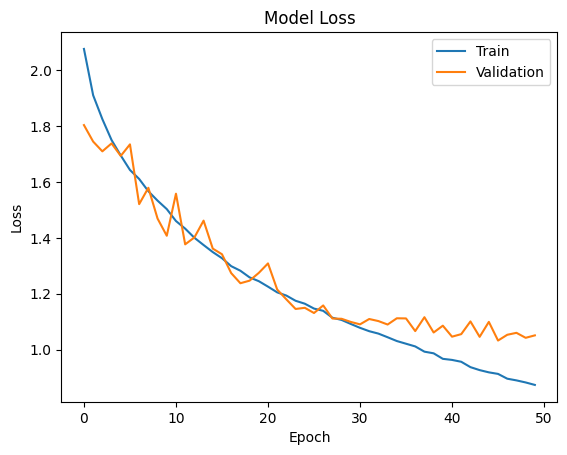

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Save the model & CM

56/56 [==============================] - 4s 72ms/step


<Figure size 640x480 with 0 Axes>

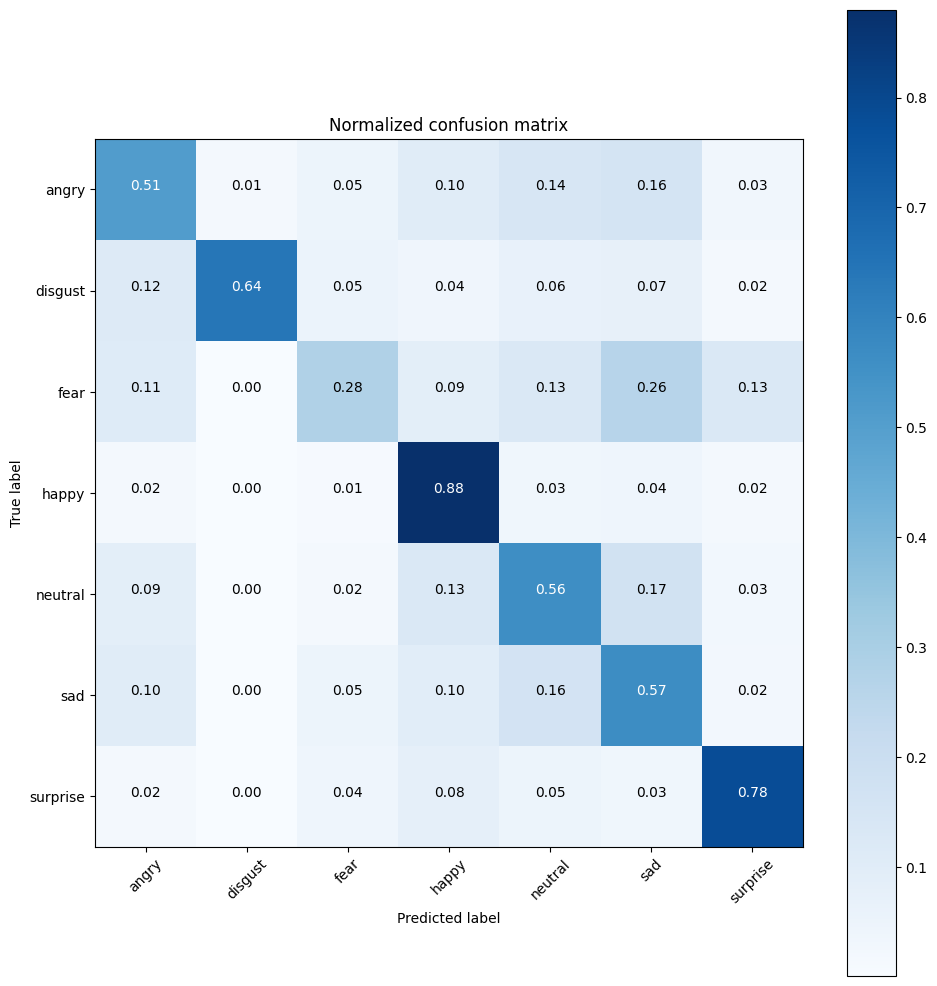

In [12]:
model.save('model_1.h5')

# show the confusion matrix of our predictions
# compute predictions

predictions = model.predict(validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

## Model 2
### change number of layers
### change dropout rate to 0.2
### Simplified structure

In [13]:
# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(32, (3,3), padding='same', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 2nd Convolution layer
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 3rd Convolution layer
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## Train model 2

In [14]:
callbacks = [
    ModelCheckpoint(
        filepath="./models/original_model.keras",
        save_best_only=True,
        monitor="val_loss")
]

with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset,
        epochs=50,
        validation_data=validation_dataset,
        callbacks=callbacks)

Epoch 1/50
226/226 [==============================] - 33s 132ms/step - loss: 1.9184 - accuracy: 0.2734 - val_loss: 1.6237 - val_accuracy: 0.3639
Epoch 2/50
226/226 [==============================] - 7s 32ms/step - loss: 1.6832 - accuracy: 0.3585 - val_loss: 1.6281 - val_accuracy: 0.3871
Epoch 3/50
226/226 [==============================] - 7s 32ms/step - loss: 1.6036 - accuracy: 0.3856 - val_loss: 1.5609 - val_accuracy: 0.4106
Epoch 4/50
226/226 [==============================] - 7s 32ms/step - loss: 1.5385 - accuracy: 0.4086 - val_loss: 1.5470 - val_accuracy: 0.4256
Epoch 5/50
226/226 [==============================] - 8s 33ms/step - loss: 1.4928 - accuracy: 0.4285 - val_loss: 1.4574 - val_accuracy: 0.4534
Epoch 6/50
226/226 [==============================] - 7s 32ms/step - loss: 1.4470 - accuracy: 0.4471 - val_loss: 1.4378 - val_accuracy: 0.4611
Epoch 7/50
226/226 [==============================] - 8s 33ms/step - loss: 1.4089 - accuracy: 0.4622 - val_loss: 1.3951 - val_accuracy: 0.47

## Model_2 evaluation

In [15]:
score = model.evaluate(validation_dataset)
# Print the accuracy
print("Validation Loss:", score[0])
print("Validation Accuracy:", score[1])

56/56 [==============================] - 1s 21ms/step - loss: 1.0721 - accuracy: 0.6121
Validation Loss: 1.0721009969711304
Validation Accuracy: 0.6120860576629639


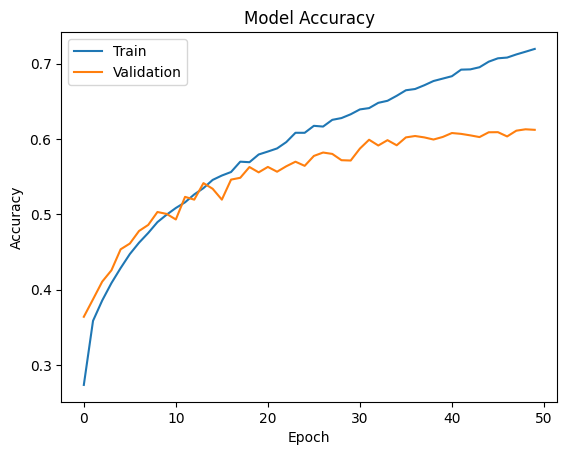

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

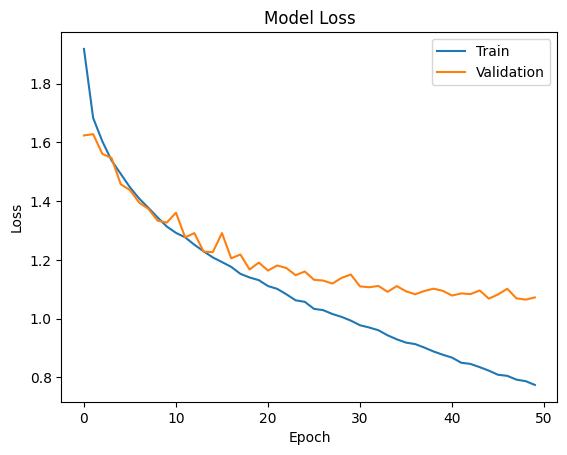

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

56/56 [==============================] - 2s 26ms/step


<Figure size 640x480 with 0 Axes>

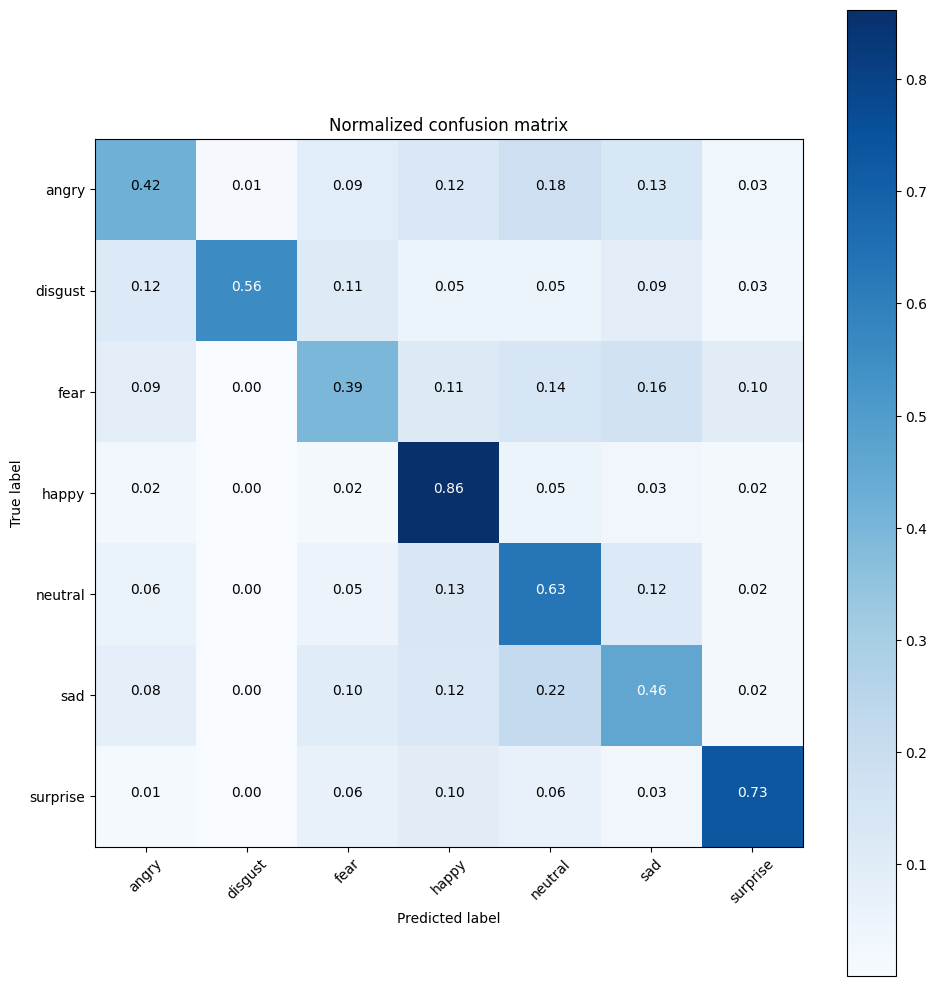

In [18]:
model.save('model_2.h5')

# show the confusion matrix of our predictions
# compute predictions

predictions = model.predict(validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

## Train Model 3
### Change optimizer and learning rate
### Add one more convolutional layer

In [9]:
from tensorflow.keras.optimizers import RMSprop

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(32, (3,3), padding='same', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 2nd Convolution layer
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 3rd Convolution layer
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 4th Convolution layer
model.add(Conv2D(256, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# 5th Convolution layer
model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Fully connected layer 2nd layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(nb_classes, activation='softmax'))

# Change the optimizer and learning rate
opt = RMSprop(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
callbacks = [
    ModelCheckpoint(
        filepath="./models/original_model.keras",
        save_best_only=True,
        monitor="val_loss")
]

with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset,
        epochs=50,
        validation_data=validation_dataset,
        callbacks=callbacks)

Epoch 1/50
226/226 [==============================] - 47s 172ms/step - loss: 1.8876 - accuracy: 0.2809 - val_loss: 2.5217 - val_accuracy: 0.2914
Epoch 2/50
226/226 [==============================] - 8s 35ms/step - loss: 1.5934 - accuracy: 0.3946 - val_loss: 1.5724 - val_accuracy: 0.4189
Epoch 3/50
226/226 [==============================] - 9s 39ms/step - loss: 1.4479 - accuracy: 0.4413 - val_loss: 2.1085 - val_accuracy: 0.3602
Epoch 4/50
226/226 [==============================] - 9s 40ms/step - loss: 1.3480 - accuracy: 0.4843 - val_loss: 1.5222 - val_accuracy: 0.4471
Epoch 5/50
226/226 [==============================] - 9s 38ms/step - loss: 1.2824 - accuracy: 0.5105 - val_loss: 1.2446 - val_accuracy: 0.5406
Epoch 6/50
226/226 [==============================] - 9s 38ms/step - loss: 1.2232 - accuracy: 0.5347 - val_loss: 1.2581 - val_accuracy: 0.5258
Epoch 7/50
226/226 [==============================] - 9s 38ms/step - loss: 1.1786 - accuracy: 0.5498 - val_loss: 1.1720 - val_accuracy: 0.55

56/56 [==============================] - 2s 24ms/step - loss: 1.9301 - accuracy: 0.5490
Validation Loss: 1.9301064014434814
Validation Accuracy: 0.5489668846130371


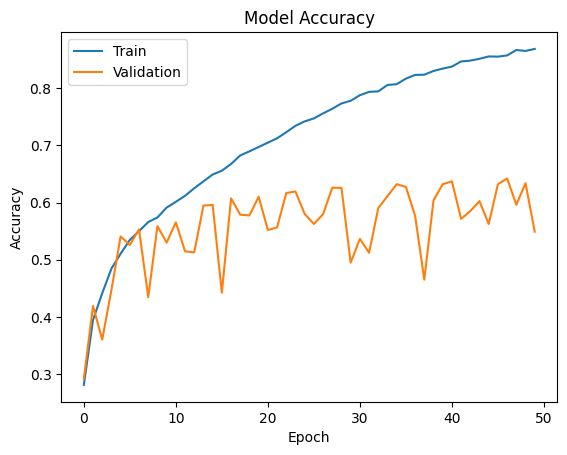

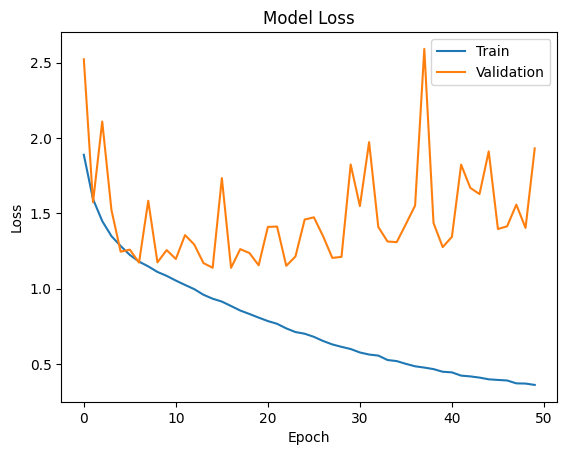

In [11]:
score = model.evaluate(validation_dataset)
# Print the accuracy
print("Validation Loss:", score[0])
print("Validation Accuracy:", score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

56/56 [==============================] - 42s 764ms/step


<Figure size 640x480 with 0 Axes>

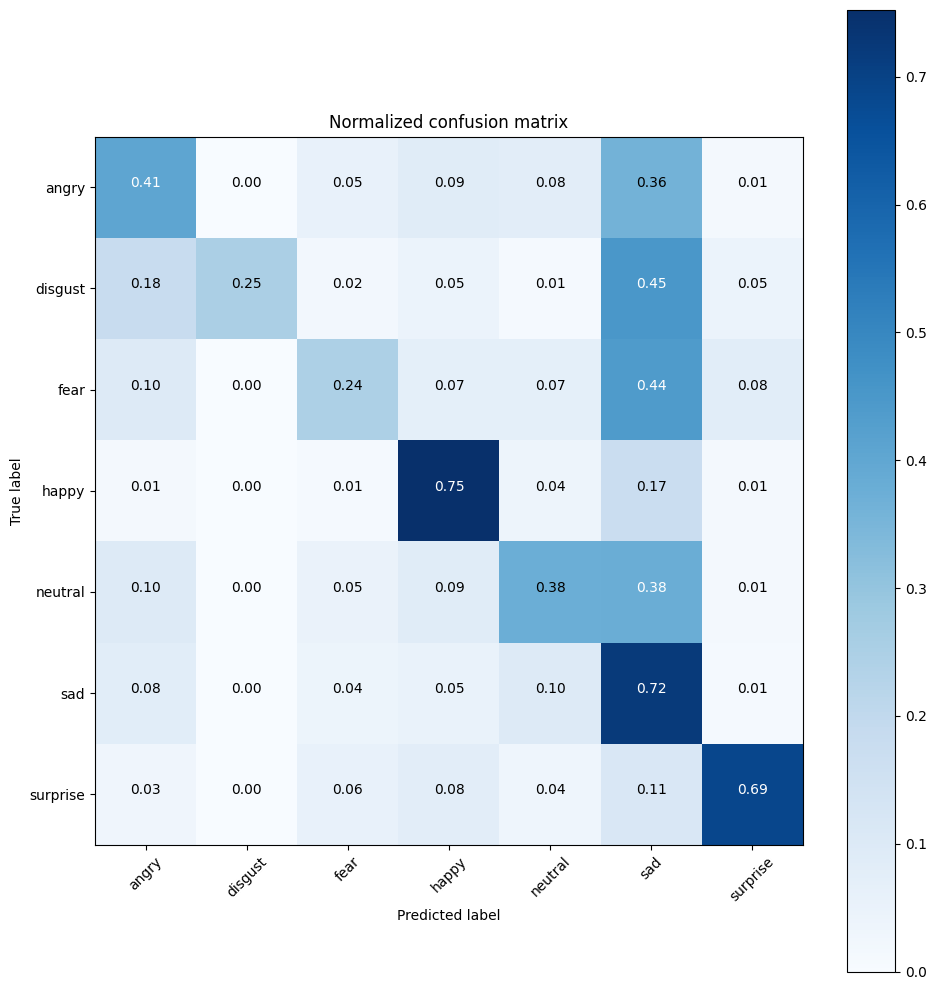

In [13]:
model.save('model_3.h5')

# show the confusion matrix of our predictions
# compute predictions

predictions = model.predict(validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

## Model 4
### change activation function using gelu, selu, leakyRelu and ELU

In [15]:
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import RMSprop
import tensorflow_addons as tfa

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48, 48, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 2nd Convolution layer
model.add(Conv2D(128, (3,3), padding='same', activation=tfa.activations.gelu))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 3rd Convolution layer
model.add(Conv2D(256, (3,3), padding='same', activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 4th Convolution layer
model.add(Conv2D(512, (3,3), padding='same', activation='selu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(1024, activation=tfa.activations.gelu))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Fully connected layer 2nd layer
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(nb_classes, activation='softmax'))

# Change the optimizer and learning rate
opt = RMSprop(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
callbacks = [
    ModelCheckpoint(
        filepath="./models/original_model.keras",
        save_best_only=True,
        monitor="val_loss")
]

with tf.device('/GPU:0'):
    history = model.fit(
        train_dataset,
        epochs=50,
        validation_data=validation_dataset,
        callbacks=callbacks)

Epoch 1/50
226/226 [==============================] - 17s 63ms/step - loss: 2.3924 - accuracy: 0.2653 - val_loss: 1.9832 - val_accuracy: 0.2962
Epoch 2/50
226/226 [==============================] - 14s 63ms/step - loss: 1.7871 - accuracy: 0.3900 - val_loss: 1.5828 - val_accuracy: 0.4315
Epoch 3/50
226/226 [==============================] - 15s 64ms/step - loss: 1.5664 - accuracy: 0.4549 - val_loss: 1.5089 - val_accuracy: 0.4384
Epoch 4/50
226/226 [==============================] - 14s 63ms/step - loss: 1.4323 - accuracy: 0.4976 - val_loss: 1.5062 - val_accuracy: 0.4853
Epoch 5/50
226/226 [==============================] - 14s 63ms/step - loss: 1.3340 - accuracy: 0.5268 - val_loss: 1.4057 - val_accuracy: 0.4982
Epoch 6/50
226/226 [==============================] - 14s 63ms/step - loss: 1.2655 - accuracy: 0.5553 - val_loss: 1.7995 - val_accuracy: 0.4007
Epoch 7/50
226/226 [==============================] - 15s 65ms/step - loss: 1.2023 - accuracy: 0.5763 - val_loss: 1.4798 - val_accuracy:

56/56 [==============================] - 2s 25ms/step - loss: 1.8588 - accuracy: 0.5993
Validation Loss: 1.8587638139724731
Validation Accuracy: 0.5993490219116211


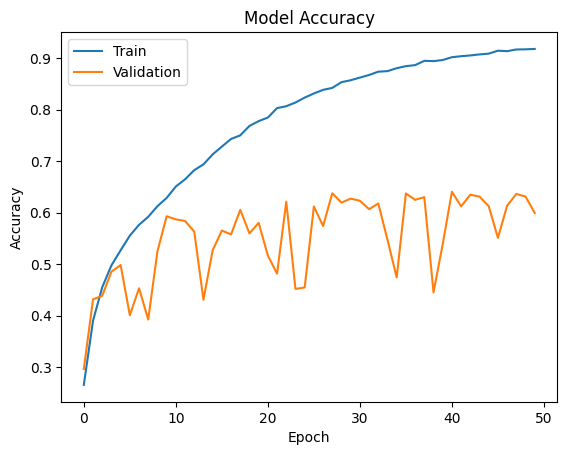

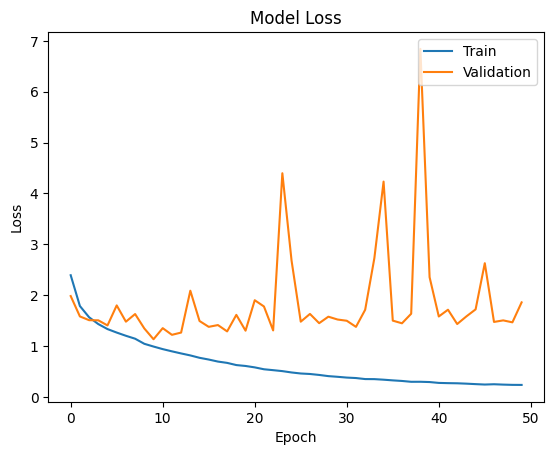

In [17]:
score = model.evaluate(validation_dataset)
# Print the accuracy
print("Validation Loss:", score[0])
print("Validation Accuracy:", score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

56/56 [==============================] - 2s 26ms/step


<Figure size 640x480 with 0 Axes>

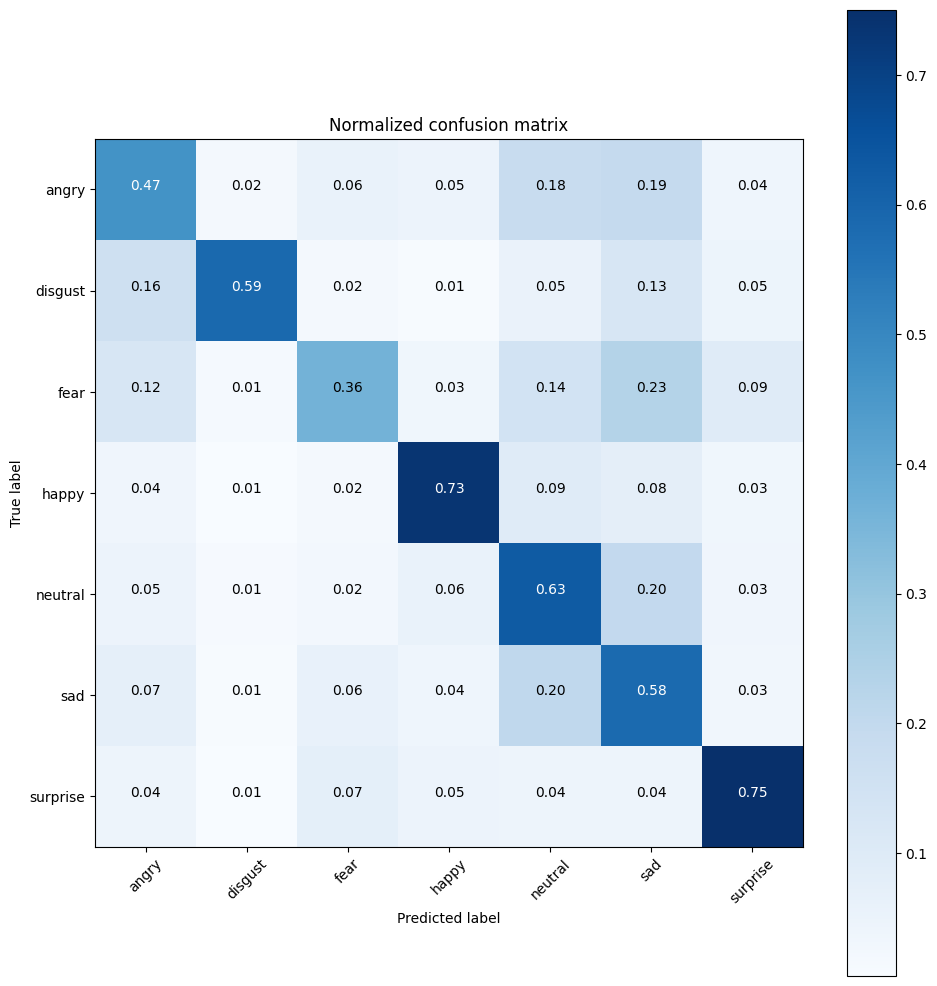

In [18]:
model.save('model_4.h5')

# show the confusion matrix of our predictions
# compute predictions

predictions = model.predict(validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()